# K-Means Clustering Algorithm 파이썬 구현

## 1. 데이터 불러오기
## 2. 데이터 파악
## 3. 데이터 시각화
## 4. 클러스터 개수 k 설정 및 k개의 클러스터에 데이터 랜덤하게 할당

> 4.1. 클러스터 개수 k 설정

> 4.2. k개의 클러스터에 데이터 랜덤 할당
## 5. 각 클러스터의 평균(centroid)를 구하고, 평가값 계산

> 5.1. 각 클러스터의 평균(centroid) 계산

> 5.2. 각 클러스터 안에 있는 모든 데이터에서 평균(centroid)까지의 거리 합 계산

> 5.3. 평가값 산출

## 6. 모든 데이터를 k개의 평균(centroid) 중에서 가장 가까운 클러스터로 재할당하여 새로운 클러스터 해 구성

## 7. 클러스터 해의 변화가 있는지 확인

> 7.1. 새로운 클러스터의 평균(centroid) 계산

> 7.2. 이전의 centroids와 새로운 centroids 비교

## 8. 변화가 있다면 6번으로 다시 돌아가서 반복하고, 변화가 없다면 결과값 출력

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from copy import deepcopy

## 1. 데이터 불러오기

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
ruspini = pd.read_table("/content/drive/MyDrive/경영과학2/dataset/ruspini.txt", sep=" ")
ruspini

,x,y
0,4,53
1,5,63
2,10,59
3,9,77
4,13,49
...,...,...
70,66,23
71,61,25
72,76,27
73,72,31


## 2. 데이터 파악

In [6]:
ruspini.describe()

,x,y
count,75.00000,75.000000
mean,54.88000,92.026667
std,30.50253,48.702620
min,4.00000,4.000000
25%,31.50000,56.500000
50%,52.00000,96.000000
75%,76.50000,141.500000
max,117.00000,156.000000


In [7]:
ruspini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   x       75 non-null     int64
 1   y       75 non-null     int64
dtypes: int64(2)
memory usage: 1.3 KB


## 3. 데이터 시각화

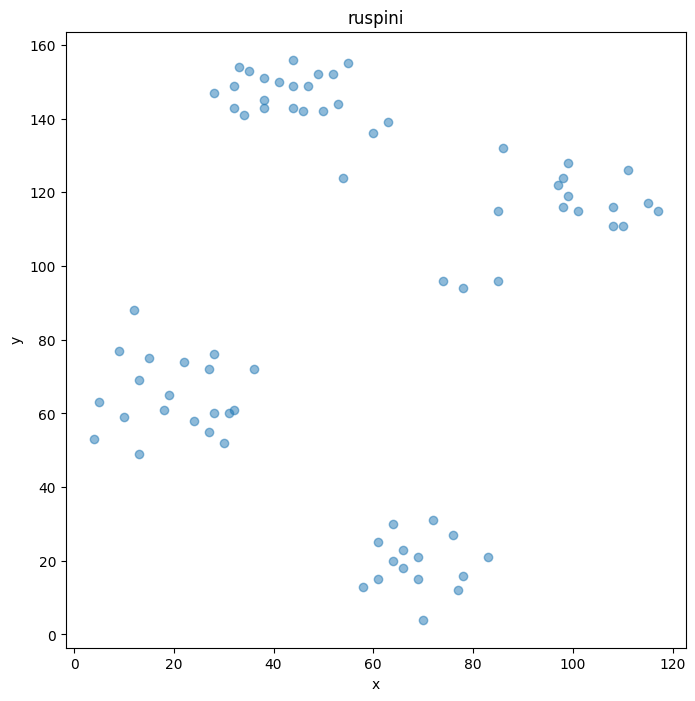

In [8]:
x = ruspini['x']
y = ruspini['y']

plt.figure(figsize=(8,8))
plt.scatter(x,y,alpha=0.5)
plt.title('ruspini')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [9]:
def kmeans(dataset, k):
  # np.random.seed(1234)
  X = np.array(dataset)

  # 4. k개의 클러스터에 데이터 랜덤 할당
    # 각 데이터에 대해 랜덤한 클러스터 선택
  cluster_labels = np.random.choice(k, size=len(X))

    # 각 클러스터에 속하는 데이터들을 저장할 빈 리스트 생성
  clusters = [[] for _ in range(k)]

    # 모든 데이터에 대해, 해당하는 클러스터 리스트에 추가
  for i in range(len(X)):
      clusters[cluster_labels[i]].append(X[i])

    # numpy array로 변환
  clusters = [np.array(cluster) for cluster in clusters]


  # 5. 각 클러스터의 평균(centroid)를 구하고, 평가값 계산
    # 5.1. 각 클러스터의 평균(centroid) 계산
  centroids = [np.mean(cluster, axis=0) for cluster in clusters]  # axis=0으로 x, y끼리 계산

  # numpy array로 변환
  centroids = np.array(centroids)

    # 5.2. 각 클러스터 안에 있는 모든 데이터에서 평균(centroid)까지의 거리 합을 계산
  distance_sums = []

  for i in range(len(clusters)):
    cluster = clusters[i]
    centroid = centroids[i]

    if len(cluster.shape) == 1:
      distance_sum = np.sqrt(np.sum((cluster - centroid)**2))
    else:
      distance_sum = np.sum(np.sqrt(np.sum((cluster - centroid)**2, axis=1)))   # axis=1로 cluster안의 데이터의 x값 - centroid의 x값, y값을 구할 수 있음

    distance_sums.append(distance_sum)

    # 5.3. 평가값 산출
  total_distance = np.sum(distance_sums)

  # ----------------------------------------------------------------------------------#
  new_centroids= np.zeros(centroids.shape)
  iter_num = 0
  error = np.ones((k, centroids.shape[1]))

  # for i in range(k):
  #     error[i] = np.sqrt(np.sum((centroids[i] - new_centroids[i])**2))

  # 8. 클러스터 해의 변화가 없을 때까지(error=0일 때까지) 반복
  while error.all() != 0 :

    iter_num += 1

    # 6. 모든 데이터를 k개의 평균(centroid) 중에서 가장 가까운 클러스터로 재할당하여 새로운 클러스터 해 구성
      # 새로운 클러스터와 레이블을 저장할 빈 리스트 생성
    cluster_labels = np.zeros(len(X))
    new_clusters = [[] for _ in range(len(centroids))]

    # 모든 데이터에 대해 반복
    for i, data in enumerate(X):

      # 각 centroid와의 거리 계산
      distances = [np.sqrt(np.sum((data - centroid)**2)) for centroid in centroids]

      # 가장 가까운 centroid의 인덱스 반환
      closest_centroid_index = np.argmin(distances)

      # 해당 클러스터에 데이터 추가 및 레이블 할당
      new_clusters[closest_centroid_index].append(data)
      cluster_labels[i] = closest_centroid_index  # 위에서 찾은 가장 가까운 centroid의 인덱스가 클러스터 레이블이 됨

    # 새로운 클러스터를 numpy array로 변환
    new_clusters = [np.array(cluster) for cluster in new_clusters]

    # for i in range(k):
    #   if len(new_clusters[i]) == 0:
    #     random_index = np.random.choice(len(X))
    #     new_clusters[i] = np.array([X[random_index]])
    #   else:
    #     new_clusters[i] = np.array(new_clusters[i])


    # 7. 클러스터 해의 변화가 있는지 확인
      # 7.1. 새로운 클러스터의 평균(centroid) 계산
    new_centroids = [np.mean(cluster, axis=0) for cluster in new_clusters]  # axis=0으로 x, y끼리 계산

    # numpy array로 변환
    new_centroids = np.array(new_centroids)

      # 7.2. 이전의 centroids와 새로운 centroids 비교
    error = np.zeros((k, centroids.shape[1]))

    for i in range(k):
      error[i] = np.sqrt(np.sum((centroids[i] - new_centroids[i])**2))

    centroids = deepcopy(new_centroids)

    distance_sums = []

    for i in range(len(new_clusters)):
      cluster = new_clusters[i]
      centroid = centroids[i]

      if len(cluster.shape) == 1:
        distance_sum = np.sqrt(np.sum((cluster - centroid)**2))
      else:
        distance_sum = np.sum(np.sqrt(np.sum((cluster - centroid)**2, axis=1)))   # axis=1로 cluster안의 데이터의 x값 - centroid의 x값, y값을 구할 수 있음

      distance_sums.append(distance_sum)

      # 5.3. 평가값 산출
    total_distance = np.sum(distance_sums)

  # 최종 클러스터링 결과 출력
  print("반복 횟수: ", iter_num, sep='\n')
  print("최종 클러스터: ", new_clusters, sep='\n')
  print("클러스터 레이블: ", cluster_labels, sep='\n')
  print("최종 평가값: ", total_distance, sep='\n')
  plt.scatter(X[:,0], X[:,1], c=cluster_labels, alpha=0.5)
  plt.scatter(centroids[:,0], centroids[:,1], c='red', marker='D')
  plt.show()

반복 횟수: 
3
최종 클러스터: 
[array([[70,  4],
       [77, 12],
       [83, 21],
       [61, 15],
       [69, 15],
       [78, 16],
       [66, 18],
       [58, 13],
       [64, 20],
       [69, 21],
       [66, 23],
       [61, 25],
       [76, 27],
       [72, 31],
       [64, 30]]), array([[ 4, 53],
       [ 5, 63],
       [10, 59],
       [ 9, 77],
       [13, 49],
       [13, 69],
       [12, 88],
       [15, 75],
       [18, 61],
       [19, 65],
       [22, 74],
       [27, 72],
       [28, 76],
       [24, 58],
       [27, 55],
       [28, 60],
       [30, 52],
       [31, 60],
       [32, 61],
       [36, 72]]), array([[ 28, 147],
       [ 32, 149],
       [ 35, 153],
       [ 33, 154],
       [ 38, 151],
       [ 41, 150],
       [ 38, 145],
       [ 38, 143],
       [ 32, 143],
       [ 34, 141],
       [ 44, 156],
       [ 44, 149],
       [ 44, 143],
       [ 46, 142],
       [ 47, 149],
       [ 49, 152],
       [ 50, 142],
       [ 53, 144],
       [ 52, 152],
       [ 55, 155],


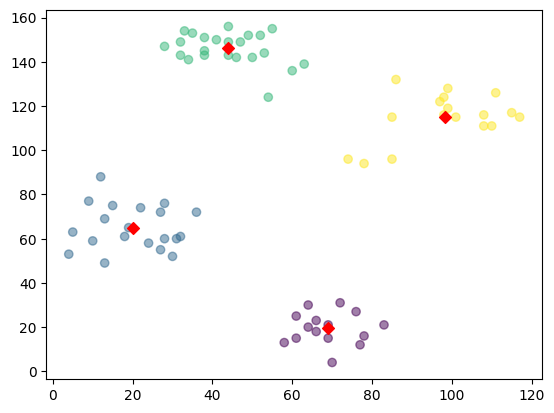

In [12]:
kmeans(ruspini, 4)

### Iris dataset

In [13]:
iris = pd.read_table("/content/drive/MyDrive/경영과학2/dataset/iris.txt", sep=" ", header = None)
iris.columns = ['x1', 'x2', 'x3', 'x4']
iris

,x1,x2,x3,x4
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


반복 횟수: 
5
최종 클러스터: 
[array([[6.9, 3.1, 4.9, 1.5],
       [6.7, 3. , 5. , 1.7],
       [6.3, 3.3, 6. , 2.5],
       [7.1, 3. , 5.9, 2.1],
       [6.3, 2.9, 5.6, 1.8],
       [6.5, 3. , 5.8, 2.2],
       [7.6, 3. , 6.6, 2.1],
       [7.3, 2.9, 6.3, 1.8],
       [6.7, 2.5, 5.8, 1.8],
       [7.2, 3.6, 6.1, 2.5],
       [6.5, 3.2, 5.1, 2. ],
       [6.4, 2.7, 5.3, 1.9],
       [6.8, 3. , 5.5, 2.1],
       [6.4, 3.2, 5.3, 2.3],
       [6.5, 3. , 5.5, 1.8],
       [7.7, 3.8, 6.7, 2.2],
       [7.7, 2.6, 6.9, 2.3],
       [6.9, 3.2, 5.7, 2.3],
       [7.7, 2.8, 6.7, 2. ],
       [6.7, 3.3, 5.7, 2.1],
       [7.2, 3.2, 6. , 1.8],
       [6.4, 2.8, 5.6, 2.1],
       [7.2, 3. , 5.8, 1.6],
       [7.4, 2.8, 6.1, 1.9],
       [7.9, 3.8, 6.4, 2. ],
       [6.4, 2.8, 5.6, 2.2],
       [6.1, 2.6, 5.6, 1.4],
       [7.7, 3. , 6.1, 2.3],
       [6.3, 3.4, 5.6, 2.4],
       [6.4, 3.1, 5.5, 1.8],
       [6.9, 3.1, 5.4, 2.1],
       [6.7, 3.1, 5.6, 2.4],
       [6.9, 3.1, 5.1, 2.3],
       [6.8, 3.2, 5.9,

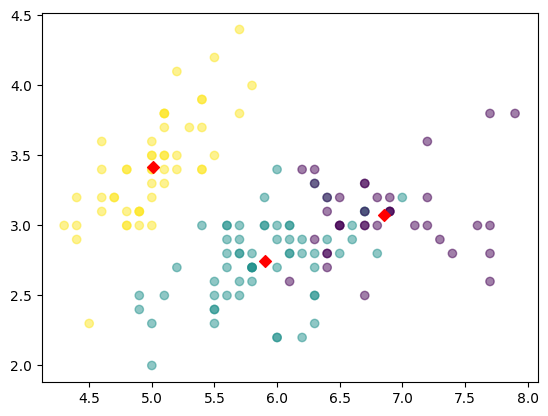

In [79]:
kmeans(iris, 3)